In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:

df = pd.read_csv("train_and_test2.csv")
df.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [5]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Sex'] = df['Sex'].astype(str).str.lower()
df.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [9]:
#df['FamilySize'] = df['sibsp'] + df['Parch'] + 1
#df['IsAlone'] = (df['FamilySize']==1).astype(int)
#df['Title'] = df['Name'].str.extract(r',\s*([^\.]+)\.').fillna('Unknown').str.strip()
#rare_titles = df['Title'].value_counts()[df['Title'].value_counts()<10].index
#df['Title'] = np.where(df['Title'].isin(rare_titles), 'Rare', df['Title'])
#df.head()

KeyError: 'Title'

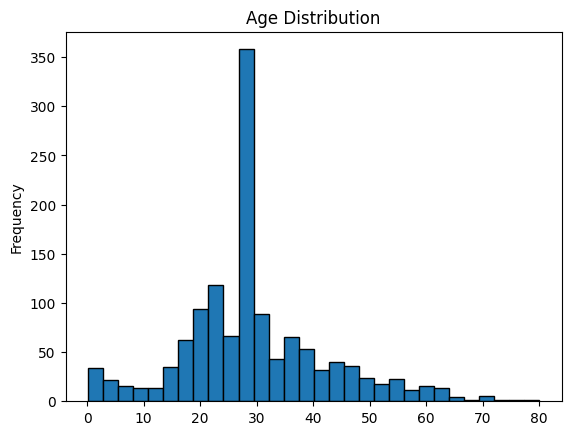

In [10]:
df['Age'].plot(kind='hist', bins=30, edgecolor='black', title='Age Distribution')
plt.show()

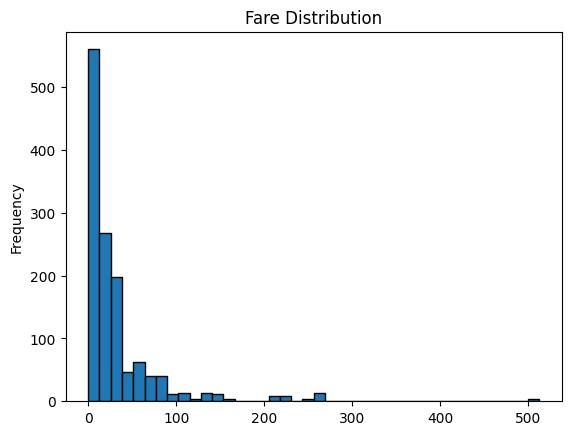

In [11]:
df['Fare'].plot(kind='hist', bins=40, edgecolor='black', title='Fare Distribution')
plt.show()

In [14]:
df.columns = df.columns.str.strip()   # চারপাশের স্পেস সরাবে
df.columns = df.columns.str.capitalize()  # চাইলে প্রথম অক্ষর বড় করে নিতে পারেন
print(df.columns)

df.pivot_table(index='Sex', values='Survived', aggfunc='mean')['Survived'].plot(kind='bar', title='Survival Rate by Sex')
plt.show()

Index(['Passengerid', 'Age', 'Fare', 'Sex', 'Sibsp', 'Zero', 'Zero.1',
       'Zero.2', 'Zero.3', 'Zero.4', 'Zero.5', 'Zero.6', 'Parch', 'Zero.7',
       'Zero.8', 'Zero.9', 'Zero.10', 'Zero.11', 'Zero.12', 'Zero.13',
       'Zero.14', 'Pclass', 'Zero.15', 'Zero.16', 'Embarked', 'Zero.17',
       'Zero.18', '2urvived', 'Familysize', 'Isalone'],
      dtype='object')


KeyError: 'Survived'

In [15]:
df.pivot_table(index='Pclass', values='Survived', aggfunc='mean')['Survived'].plot(kind='bar', title='Survival Rate by Pclass')
plt.show()

KeyError: 'Survived'

In [16]:
df.pivot_table(index='Embarked', values='Survived', aggfunc='mean')['Survived'].plot(kind='bar', title='Survival Rate by Embarked')
plt.show()

KeyError: 'Survived'

## Summary Report

In [17]:
print('Missing values:')
print(df.isna().sum())

print('\nNumeric Summary:')
print(df.describe())

Missing values:
Passengerid    0
Age            0
Fare           0
Sex            0
Sibsp          0
Zero           0
Zero.1         0
Zero.2         0
Zero.3         0
Zero.4         0
Zero.5         0
Zero.6         0
Parch          0
Zero.7         0
Zero.8         0
Zero.9         0
Zero.10        0
Zero.11        0
Zero.12        0
Zero.13        0
Zero.14        0
Pclass         0
Zero.15        0
Zero.16        0
Embarked       0
Zero.17        0
Zero.18        0
2urvived       0
Familysize     0
Isalone        0
dtype: int64

Numeric Summary:
       Passengerid          Age         Fare        Sibsp    Zero  Zero.1  \
count  1309.000000  1309.000000  1309.000000  1309.000000  1309.0  1309.0   
mean    655.000000    29.503186    33.281086     0.498854     0.0     0.0   
std     378.020061    12.905241    51.741500     1.041658     0.0     0.0   
min       1.000000     0.170000     0.000000     0.000000     0.0     0.0   
25%     328.000000    22.000000     7.895800     0.000000 